In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/AAPL.csv')

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470744,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481926,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800


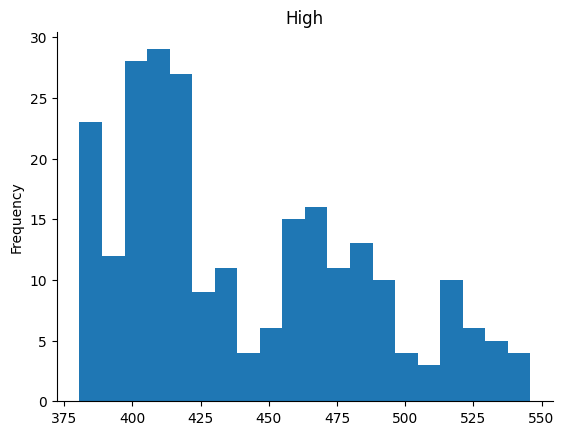

In [ ]:
# @title High

from matplotlib import pyplot as plt
stock_data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

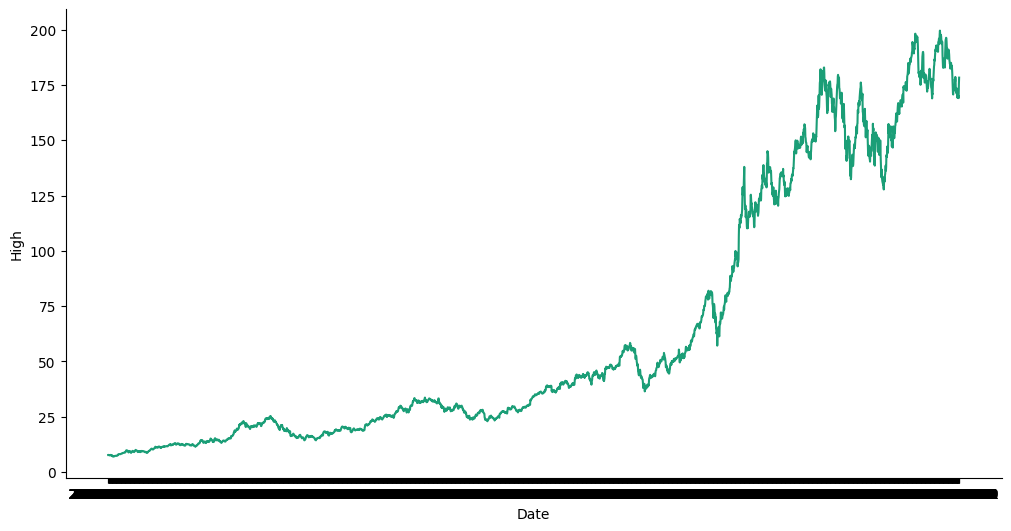

In [ ]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

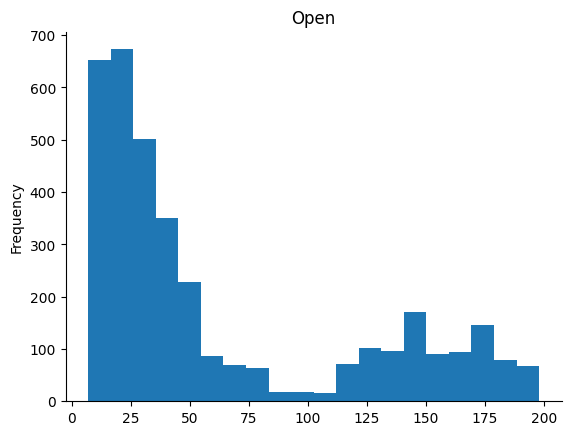

In [ ]:
# @title Open

from matplotlib import pyplot as plt
stock_data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

# New Section

In [ ]:
X = stock_data.drop(['Date','Open'],axis=1)
Y = stock_data['Open']

In [ ]:
print(X)

            High         Low       Close   Adj Close     Volume
0       7.660714    7.585000    7.643214    6.470744  493729600
1       7.699643    7.616071    7.656429    6.481926  601904800
2       7.686786    7.526786    7.534643    6.378825  552160000
3       7.571429    7.466071    7.520714    6.367033  477131200
4       7.571429    7.466429    7.570714    6.409364  447610800
...          ...         ...         ...         ...        ...
3588  169.199997  168.240005  168.449997  168.449997   37425500
3589  170.080002  168.350006  169.669998  169.669998   42451200
3590  169.089996  167.110001  167.779999  167.779999   49709300
3591  175.460007  168.160004  175.039993  175.039993   91070300
3592  178.360001  174.210007  176.550003  176.550003  101593300

[3593 rows x 5 columns]


In [ ]:
print(Y)

0         7.622500
1         7.664286
2         7.656429
3         7.562500
4         7.510714
           ...    
3588    169.029999
3589    168.699997
3590    168.800003
3591    168.339996
3592    174.259995
Name: Open, Length: 3593, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=30)

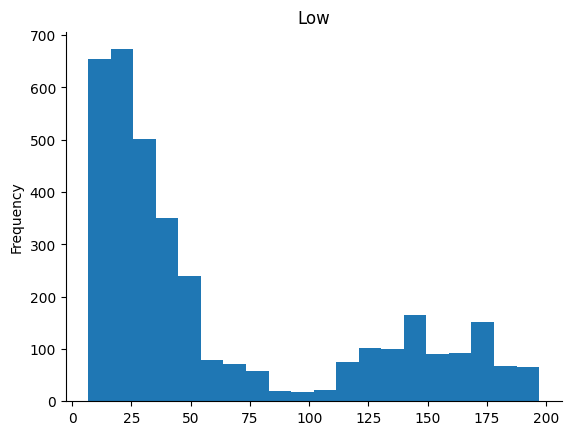

In [ ]:
# @title Low

from matplotlib import pyplot as plt
stock_data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 29.41727468  21.59245024 115.83790012  43.65125015  24.91771803
  32.15844988  47.09752534   8.43893575  18.90106034  24.10030708
 154.34049769 180.15679882  27.1162999   12.26500353  35.36999967
  94.0629999   27.42967486  24.94355022  10.43260004  44.06815055
  32.91267497  23.9277567  166.18029927 111.15565031  15.17173202
  95.48847313  32.15742564 132.6981      14.52199288  73.89157644
  36.52960052  13.63878569 159.0254985   30.22120012  30.95039987
  27.65359981  26.71402518  53.15115063  19.80436815  43.12089924
  13.12410687 178.08780144  12.48070358 172.85740152  51.54744956
  16.19949621  35.85117405  56.87437531   7.2498679   51.22144884
  27.87469984 146.92800339  50.75830071  31.95359983  14.34373555
 136.49089964 119.69390143 143.02230193  64.23062322 143.88320316
 174.92780107 119.92062558  24.65429315  24.76273196  27.34692497
  14.42828925  13.32212827  24.01713942  37.50580076  14.32505353
  12.03233216 190.07820217  12.26363223  20.03542847  43.88887523
 144.65490

In [ ]:
Accuracy_score = metrics.r2_score(Y_test, test_data_prediction)
print("Accuracy : ", Accuracy_score*100,'%')

Accuracy :  99.98500312293481 %


In [ ]:
Y_test = list(Y_test)

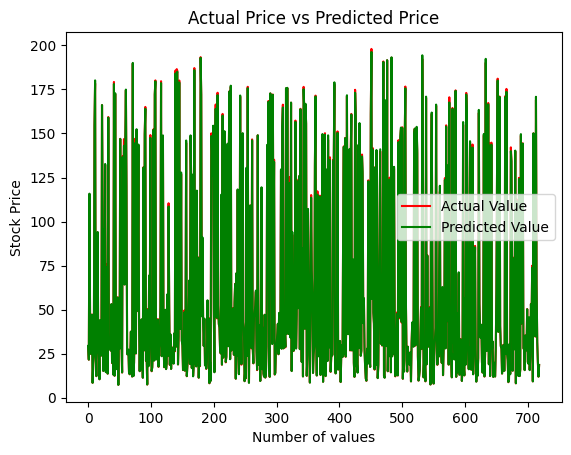

In [ ]:

plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Stock Price')
plt.legend()
plt.show()